# Preprocessing Data

## Categorical Data

### Dummy Variables

* scikit-learn: `OneHotEncoder()`
* pandas: `get_dummies()`

In [1]:
import pandas as pd
import numpy as np

data_path = "../datasets/"

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [18]:
from sklearn.impute import SimpleImputer

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.preprocessing import scale

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn.metrics import accuracy_score

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
from sklearn.metrics import classification_report

In [2]:
auto_df = pd.read_csv(data_path + "mpg.csv", index_col=0)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


In [3]:
auto_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model-year origin  
0          70    usa  
1          70    usa  
2          70    usa  
3          70    usa  
4          70    usa

In [4]:
auto_df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [5]:
auto_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
origin          0
dtype: int64

In [6]:
auto_df.dropna(inplace=True)

auto_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
origin          0
dtype: int64

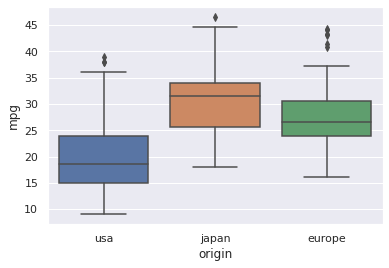

In [8]:
sns.boxplot(x='origin', y='mpg', data=auto_df)
plt.show()

In [9]:
# Encoding dummy variables

df_origin = pd.get_dummies(auto_df)
df_origin

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model-year  origin_europe  origin_japan  origin_usa  
0            70              0             0           1  
1            70              0             0           1  
2            70              0             0           1  
3            70              0             0           1  
4            70              0             0           1  
..          ...            ...           ...         ...  
393          82              0             0           1  
394          82              1             0           0  
395          82              0             0           1  
396          82              0             0           1  
397          82              0             0           1  

[396 rows x 10 columns]

In [10]:
# if origin_europe is 0 and origin_japan is 0, we know its origin_usa

df_origin = df_origin.drop('origin_usa', axis=1)
print(df_origin.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model-year  origin_europe  origin_japan  
0          70              0             0  
1          70              0             0  
2          70              0             0  
3          70              0             0  
4          70              0             0  


In [12]:
X = df_origin.drop('mpg', axis=1).values
y = df_origin.mpg.values

splits = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_train shape: {y_test.shape}")

X_train shape: (277, 8)
X_test shape: (119, 8)
y_train shape: (277,)
y_train shape: (119,)


In [13]:
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
print(f"Ridge Score: {ridge.score(X_test, y_test)}")

Ridge Score: 0.7542622918870207


#### PIMA Indian dataset

In [14]:
diabetes = pd.read_csv(data_path + "diabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
diabetes.describe()

pregnancies     glucose   diastolic     triceps     insulin  \
count   768.000000  768.000000  768.000000  768.000000  768.000000   
mean      3.845052  120.894531   69.105469   20.536458   79.799479   
std       3.369578   31.972618   19.355807   15.952218  115.244002   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000   62.000000    0.000000    0.000000   
50%       3.000000  117.000000   72.000000   23.000000   30.500000   
75%       6.000000  140.250000   80.000000   32.000000  127.250000   
max      17.000000  199.000000  122.000000   99.000000  846.000000   

              bmi         dpf         age    diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [16]:
# glucose, diastolic, triceps, insulin and bmi cannot be 0, its pretty much equivalent to dead.
# replacing 0 with NaN

cols_cant_be_zero = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']
for col in cols_cant_be_zero:
    diabetes[col].replace(0, np.nan, inplace=True)

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      763 non-null    float64
 2   diastolic    733 non-null    float64
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [17]:
diabetes.head()

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6    148.0       72.0     35.0      NaN  33.6  0.627   50   
1            1     85.0       66.0     29.0      NaN  26.6  0.351   31   
2            8    183.0       64.0      NaN      NaN  23.3  0.672   32   
3            1     89.0       66.0     23.0     94.0  28.1  0.167   21   
4            0    137.0       40.0     35.0    168.0  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

## Handling Missing data

In [19]:
X_diab = diabetes.drop('diabetes', axis=1).values
y_diab = diabetes.diabetes.values

In [20]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_diab)
X_diab = imp.transform(X_diab)

### Imputing with pipeline

In [22]:
X_diab = diabetes.drop('diabetes', axis=1).values
y_diab = diabetes.diabetes.values

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

logreg = LogisticRegression(solver='liblinear')

steps = [('imputation', imp),
         ('logistic_regression', logreg)]

pipeline = Pipeline(steps)

splits = train_test_split(X_diab, y_diab, test_size=0.3, random_state=42)
X_train_diab, X_test_diab, y_train_diab, y_test_diab = splits

print(f"X_train_diab shape: {X_train_diab.shape}")
print(f"X_test_diab shape: {X_test_diab.shape}")
print(f"y_train_diab shape: {y_train_diab.shape}")
print(f"y_train_diab shape: {y_test_diab.shape}")

pipeline.fit(X_train_diab, y_train_diab)

y_pred = pipeline.predict(X_test_diab)

print(f"Accuracy: {pipeline.score(X_test_diab, y_test_diab)}")

X_train_diab shape: (537, 8)
X_test_diab shape: (231, 8)
y_train_diab shape: (537,)
y_train_diab shape: (231,)
Accuracy: 0.7489177489177489


## Centering and Scaling

In [58]:
wine = pd.read_csv(data_path + "winequality-red.csv", sep=";")
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [59]:
wine_X = wine.drop('quality', axis=1)
wine_X.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

In [60]:
X_scaled = scale(wine_X.values)

print(f"Mean X: {np.mean(X)}")
print(f"Mean X_scaled: {np.mean(X_scaled)}")
print(f"Std dev X: {np.std(X)}")
print(f"Std dev X_scaled: {np.std(X_scaled)}")

Mean X: 421.0320707070707
Mean X_scaled: 2.546626531486538e-15
Std dev X: 1012.6777083045597
Std dev X_scaled: 1.0


In [68]:
wine['quality'] = pd.Categorical(wine.quality, ordered=False)

In [69]:
y = wine.quality.values

In [70]:
y

[5, 5, 5, 6, 5, ..., 5, 6, 6, 5, 6]
Length: 1599
Categories (6, int64): [3, 4, 5, 6, 7, 8]

#### Using Pipeline

In [72]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

splits = train_test_split(wine_X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = splits

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5708333333333333


#### CV and scaling in a pipeline

In [78]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors': np.arange(1, 50)}

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print(f"best params: {cv.best_params_}")
print(f"score: {cv.score(X_test, y_test)}")
print(f"classification report: \n{classification_report(y_test, y_pred)}")

best params: {'knn__n_neighbors': 1}
score: 0.6229166666666667
classification report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.14      0.12      0.13        17
           5       0.73      0.67      0.70       195
           6       0.62      0.64      0.63       200
           7       0.53      0.64      0.58        61
           8       0.20      0.17      0.18         6

    accuracy                           0.62       480
   macro avg       0.37      0.37      0.37       480
weighted avg       0.63      0.62      0.62       480

